https://github.com/NanoComp/meep/blob/master/python/examples/straight-waveguide.ipynb  

https://stackoverflow.com/questions/29454002/filenotfounderror-errno-2-no-such-file-or-directory-ffmpeg


In [1]:
import math
import meep as mp
from meep import mpb

import numpy as np
import matplotlib.pyplot as plt

Using MPI version 3.1, 1 processes


In [2]:
length = 30
width = 20
lengthPhC = length - 10
widthPhC = width - 4
wgi = 1
Nx = int(lengthPhC)
Ny = int(widthPhC)
r = 1/4
eps = 11.7

cell = mp.Vector3(length,width,0)

blk = mp.Block(mp.Vector3((length - 10),widthPhC,mp.inf),
                     center=mp.Vector3(),
                     material=mp.Medium(epsilon=eps))

waveguide = mp.Block(mp.Vector3(mp.inf,wgi*np.sqrt(3),mp.inf),
                     center=mp.Vector3(),
                     material=mp.Medium(epsilon=eps))
geometry = [blk]
geometry.append(waveguide)

for j in range(Ny):
    for i in range(Nx+1):
        shift_y = np.sqrt(3)
        geometry.append(mp.Cylinder(r, center=mp.Vector3(i-Nx/2, wgi*np.sqrt(3)/2 + shift_y*j)))
        geometry.append(mp.Cylinder(r, center=mp.Vector3(i-Nx/2, -(wgi*np.sqrt(3)/2 + shift_y*j))))
        
        geometry.append(mp.Cylinder(r, center=mp.Vector3(i-(Nx+1)/2, wgi*np.sqrt(3)/2 + shift_y*(j+1/2))))
        geometry.append(mp.Cylinder(r, center=mp.Vector3(i-(Nx+1)/2, -(wgi*np.sqrt(3)/2 + shift_y*(j+1/2)))))
        #geometry.append(mp.Cylinder(r, center=mp.Vector3(i-N/2,-wgi*np.sqrt(3)/2)))


sources = [mp.Source(mp.ContinuousSource(frequency=0.15),
                     component=mp.Hz,
                     center=mp.Vector3(-length/2 +1,0))]

pml_layers = [mp.PML(1.0)]

resolution = 10


sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

-----------
Initializing structure...
time for choose_chunkdivision = 0.0306981 s
Working in 2D dimensions.
Computational cell is 30 x 20 x 0 with resolution 10
     block, center = (0,0,0)
          size (20,16,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.7,11.7,11.7)
     block, center = (0,0,0)
          size (1e+20,1.73205,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.7,11.7,11.7)
     cylinder, center = (-10,0.866025,0)
          radius 0.25, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-10,-0.866025,0)
          radius 0.25, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-10.5,1.73205,0)
          radius 0.25, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-10.5,-1.73205,0)
      

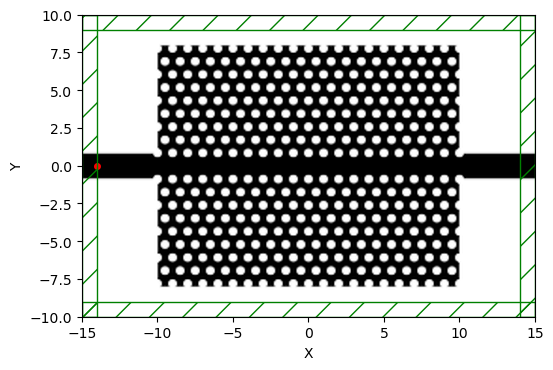

In [3]:
%matplotlib inline
plt.figure(dpi=100)
sim.plot2D()
plt.show()

FloatProgress(value=0.0, description='0% done ')

run 0 finished at t = 100.0 (2000 timesteps)


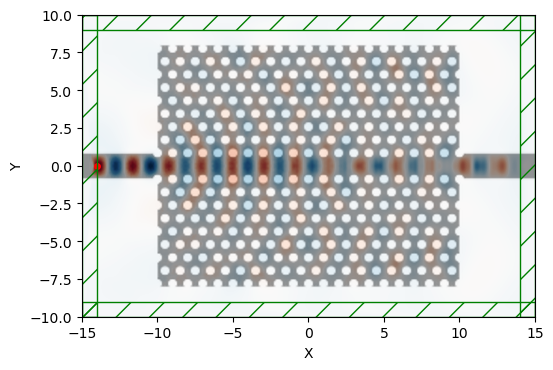

In [4]:
sim.run(until=100)

plt.figure(dpi=100)
sim.plot2D(fields=mp.Hz)
plt.show()

In [5]:
T=1

sim.reset_meep()
f = plt.figure(dpi=100)
Animate = mp.Animate2D(sim, fields=mp.Hz, f=f, realtime=False, normalize=True)
sim.run(mp.at_every(T,Animate),until=T*300)
plt.close()

-----------
Initializing structure...
time for choose_chunkdivision = 0.0202971 s
Working in 2D dimensions.
Computational cell is 30 x 20 x 0 with resolution 10
     block, center = (0,0,0)
          size (20,16,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.7,11.7,11.7)
     block, center = (0,0,0)
          size (1e+20,1.73205,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.7,11.7,11.7)
     cylinder, center = (-10,0.866025,0)
          radius 0.25, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-10,-0.866025,0)
          radius 0.25, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-10.5,1.73205,0)
          radius 0.25, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-10.5,-1.73205,0)
      

FloatProgress(value=0.0, description='0% done ', max=300.0)

Meep progress: 297.45/300.0 = 99.1% done in 4.0s, 0.0s to go
on time step 5980 (time=299), 0.00066942 s/step
Normalizing field data...
run 1 finished at t = 300.0 (6000 timesteps)


In [70]:
#Animate.to_gif(10,"test.gif")

filename = "straight_waveguide.mp4"
Animate.to_mp4(10,filename)

Generating MP4...


In [71]:
from IPython.display import Video
Video(filename)

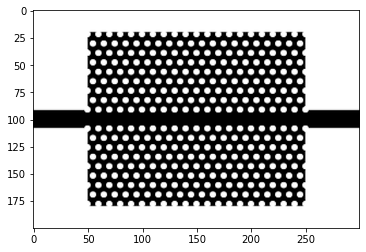

In [93]:
eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
#plt.axis('off')
plt.show()

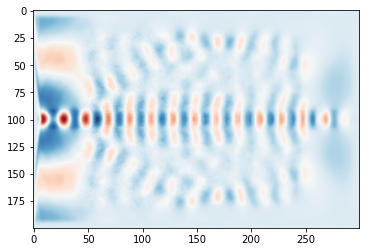

In [94]:
hz_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Hz)
plt.figure()
#plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(hz_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
#plt.axis('off')
plt.show()